# Course Name: CSC722-U15 - Machine Learning Fundamentals
# Term: Spring 2024
# CNN Implementation for MNIST Digit Recognition


## Team Information Section:

**Team Member 1 (Team Leader):** 

First Name: Mohammad Navid

Last Name: Nayyem

ID: 101159932

GitHub Account: https://github.com/navidnayyem

GitHub Repository Link: https://github.com/navidnayyem/CNN_Implementation_for_MNIST_Digit_Recognition

**Team Member 2:**

Full Name: Abdullah Al

Last Name: Rakin

ID: 101164856

GitHub Account: https://github.com/rakinabdullah

GitHub Repository Link: https://github.com/rakinabdullah/CNN-Implementation-for-MNIST-Digit-Recognition

**Team Member 3:**

Full Name: Al-Amin

Last Name: Hossain

ID: 101131177

GitHub Account: https://github.com/alaminh5n

GitHub Repository Link: https://github.com/alaminh5n/CNN-Implementation-for-MNIST-Digit-Recognition

**Team Member 4:**

First Name: Imtiaj Uddin

Last Name: Ahamed

ID: 101138784 

GitHub Account: https://github.com/Imtiaj101

GitHub Repository Link: https://github.com/Imtiaj101/CNN-Implementation-for-MNIST-Digit-Recognition

**Team Member 5:**

First Name: Fatama Tuj

Last Name: Johora

ID: 101132362

GitHub Account: https://github.com/fatama-johora

GitHub Repository Link: https://github.com/fatama-johora/CNN-Implementation-for-MNIST-Digit-Recognition

**Team Member 6:**

First Name: Md Azad Hossain

Last Name: Raju

ID: 101165306

GitHub Account: https://github.com/azad494

GitHub Repository Link: https://github.com/azad494/CNN-Implementation-for-MNIST-Digit-Recognition

**Team Member 7:**

First Name: Touhid

Last Name: Imam

ID: 101161836

GitHub Account: https://github.com/touhid-imam

GitHub Repository Link: https://github.com/touhid-imam/CNN-Implementation-for-MNIST-Digit-Recognition

**Team Member 8:**

First Name : Nowshin Binte

Last Name : Jamal

ID: 101165211

GitHub Account: https://github.com/NIHSMON

GitHub Repository Link: https://github.com/NIHSMON/CNN-Implementation-for-MNIST-Digit-Recognition

## Import Necessary Libraries and Modules

These lines of code import necessary libraries and modules for working with convolutional neural networks (CNNs) and evaluating their performance.

- `import numpy as np`: This line imports the NumPy library, a fundamental package for numerical computing with Python, and aliases it as `np` for shorter references in the code.
- `import tensorflow as tf`: This line imports the TensorFlow library, which is a popular open-source machine learning framework, used extensively for deep learning tasks. It's aliased as `tf` for convenience.
- `from sklearn.model_selection import KFold`: This line imports the `KFold` class from scikit-learn's `model_selection` module. `KFold` is a cross-validation technique that splits the dataset into k consecutive folds for training and testing.
- `from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay`: This line imports the `confusion_matrix` function and `ConfusionMatrixDisplay` class from scikit-learn's `metrics` module. These are used to compute and display confusion matrices, a useful tool for evaluating classification models.
- `import matplotlib.pyplot as plt`: This line imports the `matplotlib.pyplot` module, which provides a MATLAB-like plotting interface in Python. It's commonly used for creating visualizations like graphs and charts.
- `from tensorflow.keras import layers, models`: This line imports the `layers` and `models` modules from TensorFlow's Keras API. Keras is a high-level neural networks API that runs on top of TensorFlow, allowing for easy and fast prototyping of deep learning models.
- `from ucimlrepo import fetch_ucirepo`: This line imports the fetch_ucirepo function from the ucimlrepo module. This function is designed to fetch datasets from the UCI Machine Learning Repository, providing convenient access to a variety of datasets for machine learning tasks.

Importing these libraries and modules provides the necessary tools for building and evaluating CNN models effectively.

In [1]:
# Importing numpy library for numerical computations
import numpy as np 

# Importing TensorFlow library for deep learning tasks
import tensorflow as tf

# Importing KFold from scikit-learn for cross-validation
from sklearn.model_selection import KFold 

# Importing confusion matrix and display tools from scikit-learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importing matplotlib for plotting graphs
import matplotlib.pyplot as plt 

# Importing layers and models modules from TensorFlow's Keras API for building neural networks
from tensorflow.keras import layers, models  

# Importing the fetch_ucirepo function from the ucimlrepo module to fetch datasets from the UCI Machine Learning Repository.
from ucimlrepo import fetch_ucirepo

## Step 1. Data Preparation:

- Load the MNIST dataset. [**Reference:** https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits]

The provided code segment loads the **MNIST dataset** by fetching the **Optical Recognition of Handwritten Digits** dataset from the UCI Machine Learning Repository using the fetch_ucirepo function with dataset **ID 80**. It assigns the fetched dataset to the variable optical_recognition_of_handwritten_digits. Features (X) and targets (y) are then extracted from the fetched dataset and stored in variables X and y respectively. This process facilitates access to the dataset for subsequent machine learning tasks.

In [2]:
# Load MNIST dataset

# Fetching the Optical Recognition of Handwritten Digits dataset from the UCI Machine Learning Repository using the 
# fetch_ucirepo function, with dataset ID 80.
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 

# Extracting features (X) and targets (y) from the fetched dataset.
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 

- Data Preprocessing 

The provided code snippet performs data preprocessing steps to prepare the input data for training and evaluation with a convolutional neural network (CNN). Here's a breakdown of the process:

#### 1.1. Converting and Scaling the Feature Matrix X:
- In this code snippet, the feature matrix `X` is being converted to type float32 and then scaled by dividing each element by 16.0.

In [3]:
# Converting the feature matrix X to type float32 and scaling it by dividing by 16.0
X = X.astype('float32') / 16.0  

#### 1.2. Reshaping the feature matrix X
- In this code snippet, the feature matrix `X` is being reshaped to have dimensions (-1, 8, 8, 1). This reshaping is done to match the input shape expected by some machine learning models.

In [4]:
# Reshaping the feature matrix X to have dimensions (-1, 8, 8, 1) to match the input shape expected by some machine learning models.
X = X.values.reshape(-1, 8, 8, 1)  

#### 1.3. Converting the target array y to a NumPy array

- In this code snippet, the variable `y` is being converted to a NumPy array.

In [5]:
# Converting the target array y to a NumPy array.
y = y.values  

## Step 2, 3 and 4. Convolutional Neural Network Architecture, Max Pooling & Fully Connected Layer and Softmax:

This code defines the architecture of a Convolutional Neural Network (CNN) model using Keras' Sequential API. The model consists of several layers:

- **Convolutional Layers**: Three convolutional layers are included, each followed by a ReLU activation function. The first convolutional layer has 32 filters of size (3, 3), while the subsequent two convolutional layers have 64 and 128 filters of the same size, respectively. The 'same' padding is used to ensure that the spatial dimensions of the input and output feature maps remain the same.

- **Max Pooling Layers**: Two max-pooling layers with pool size (2, 2) are added to downsample the feature maps obtained from the convolutional layers. Max pooling helps in reducing the spatial dimensions and extracting the most important features.

- **Flatten Layer**: A flatten layer is inserted to convert the 2D output of the convolutional layers into a 1D vector. This prepares the data for input into the fully connected layers.

- **Fully Connected Layers**: A dense layer with 128 neurons and ReLU activation function is added to process the flattened input. This layer helps in learning high-level features from the extracted representations. Finally, an output layer with 10 neurons (equal to the number of classes) and softmax activation function is included to produce the classification probabilities for each class.

The code concludes by displaying a summary of the model architecture, which provides information about the layers in the model, including their types, output shapes, and the number of parameters in each layer. This summary is helpful for understanding the model's structure and complexity.


In [6]:
# Define the CNN model architecture function
def build_cnn_model():
    # Sequential model with layers defined sequentially
    model = models.Sequential([
        # Convolutional layer with 32 filters, each 3x3, ReLU activation, 'same' padding, and input shape (8, 8, 1)
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 1)),
        # Max pooling layer with pool size (2, 2)
        layers.MaxPooling2D((2, 2)),
        # Convolutional layer with 64 filters, each 3x3, ReLU activation, and 'same' padding
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        # Max pooling layer with pool size (2, 2)
        layers.MaxPooling2D((2, 2)),
        # Flattening layer to convert the 2D output to a 1D vector
        layers.Flatten(),
        # Dense (fully connected) layer with 64 units and ReLU activation
        layers.Dense(64, activation='relu'),
        # Output layer with 10 units (corresponding to 10 classes) and softmax activation
        layers.Dense(10, activation='softmax')
    ])
    # Compiling the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_cnn_model()

# Print model summary
model.summary()

C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 8, 8, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,914 (140.29 KB)

 Trainable params: 35,914 (140.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Summary

The sequential CNN model is constructed with two convolutional layers, each followed by max-pooling layers, resulting in feature maps of sizes 8x8x32 and 4x4x64, respectively. The flattened layer converts these feature maps into a 1D vector of size 256. Subsequently, a dense layer with 64 units is incorporated, leading to a final output layer with 10 units. The model comprises a total of 35,914 parameters, all of which are trainable, indicating its adaptability and capacity for learning complex representations within the data.

## 5. Training and Evaluation:

The provided code implements K-Fold Cross Validation to evaluate a Convolutional Neural Network (CNN) model's performance. It defines the number of folds for cross-validation and initializes a KFold object with shuffling enabled. For each fold, the model is trained on a subset of the training data and evaluated on a validation set. Training progress is monitored using loss and accuracy metrics, and after training, the model's performance is assessed by calculating the validation accuracy and plotting confusion matrices. These visualizations help in understanding the model's classification performance across different classes. After completing all folds, the average accuracy is calculated and printed, and the total confusion matrix is plotted. Additionally, loss and accuracy curves over epochs provide insights into the model's training progress. Overall, this code segment efficiently evaluates the CNN model's generalization performance through K-Fold Cross Validation, enabling thorough analysis and interpretation of its effectiveness in classification tasks.

#### 5.1. **Setting up K-Fold Cross-Validation**: 

- A `KFold` cross-validation splitter object is created with 5 folds, shuffling the data before splitting, and setting a random seed for reproducibility.
- Empty lists are initialized to store accuracy scores and loss values for each fold.
- The code now initializes lists, all_loss and all_val_loss, to store the loss history during training and validation phases, respectively.

In [7]:
# Creating a KFold cross-validation splitter object with 5 folds, shuffling the data before splitting, and setting a random 
# seed for reproducibility.
kf = KFold(n_splits=5, shuffle=True, random_state=42)  
acc_per_fold = []  # Initializing an empty list to store accuracy scores for each fold.
loss_per_fold = []  # Initializing an empty list to store loss values for each fold.

# Initialize lists to store loss history
all_loss = []
all_val_loss = []

# Initialize lists to store accuracy history
all_accuracy = []
all_val_accuracy = []

#### 5.2. **Model Evaluation in K-Fold Cross-Validation**:
- The code iterates for 5 folds in the KFold cross-validation splitter, creating a new instance of the CNN model for each fold.
- The training data is split into training and validation sets based on the current fold indices.
- The model is trained on the training data for 10 epochs with a batch size of 32, using the validation data for evaluation. Training progress is printed.
- Loss history for each fold is appended to the all_loss list using history.history['loss'], allowing for the tracking of training loss progression.
- Similarly, accuracy history for each fold is appended to the all_accuracy list using history.history['accuracy'], facilitating the monitoring of training accuracy evolution.
- After training, the model is evaluated on the validation set, and the evaluation scores (loss and accuracy) are printed for the current fold.
- The accuracy score and loss value for the current fold are appended to the respective lists.

In [8]:
# Iterate over each fold and its corresponding train and validation indices
for fold_no, (train_index, val_index) in enumerate(kf.split(X)):

    # Build a new instance of the model for each fold
    model = build_cnn_model()

    # Split the data into training and validation sets based on the current fold indices
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
 
    # Display the current fold number being trained
    print(f'Training fold {fold_no+1}...')

    # Train the model on the current training data and validate it on the validation data
    history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), verbose=1)
 
    # Append loss history for this fold
    all_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])
    
    # Append accuracy history for this fold
    all_accuracy.append(history.history['accuracy'])
    all_val_accuracy.append(history.history['val_accuracy'])

    # Evaluate the model's performance on the validation set
    scores = model.evaluate(X_val, y_val, verbose=0)

    # Print the evaluation scores for the current fold
    print(f'Score for fold {fold_no+1}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    # Store the accuracy and loss scores for the current fold
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

Training fold 1...
Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5086 - loss: 1.6487 - val_accuracy: 0.9199 - val_loss: 0.2671
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9447 - loss: 0.1902 - val_accuracy: 0.9609 - val_loss: 0.1362
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9736 - loss: 0.0915 - val_accuracy: 0.9600 - val_loss: 0.1465
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9810 - loss: 0.0716 - val_accuracy: 0.9751 - val_loss: 0.1118
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9856 - loss: 0.0523 - val_accuracy: 0.9822 - val_loss: 0.0647
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9885 - loss: 0.0495 - val_accuracy: 0.9760 - val_loss: 0.0885
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9876 - loss: 0.0369 - val_accuracy: 0.9822 - val_loss: 0.0676
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9906 - loss: 0.0361

Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9923 - loss: 0.0285 - val_accuracy: 0.9858 - val_loss: 0.0447
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9911 - val_loss: 0.0299
Score for fold 5: loss of 0.029918359592556953; compile_metrics of 99.11032319068909%


#### 5.3. **Average Scores Across Folds**:
- After completing all folds, the code prints the average accuracy and loss across all folds.

In [9]:
# Print average scores across all folds
print('----------------------------------------------------------------')  # Printing a separator line for clarity.
print(f'Average accuracy: {np.mean(acc_per_fold)}%')  # Printing the average accuracy across all folds.
print(f'Average loss: {np.mean(loss_per_fold)}')  # Printing the average loss across all folds.
print('----------------------------------------------------------------')  # Printing a separator line for clarity.

----------------------------------------------------------------
Average accuracy: 98.41637134552002%
Average loss: 0.055175461992621425
----------------------------------------------------------------


#### 5.4. **Confusion Matrix Visualization**:
- The model's predictions are made on the test data using the trained model.
- The predicted classes (digits) are extracted by finding the index of the highest probability in each prediction array.

In [10]:
# Predict classes for the entire dataset using the trained model
y_pred = model.predict(X) 

# Extract the predicted classes by selecting the index of the highest probability for each sample
y_pred_classes = np.argmax(y_pred, axis=1) 

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


- The confusion matrix is computed using the true labels and predicted classes on the test data.
- A ConfusionMatrixDisplay object is created for visualization, passing the computed confusion matrix as input.

In [11]:
# Compute the confusion matrix between the true labels (y) and the predicted classes
cm = confusion_matrix(y, y_pred_classes)

# Display the confusion matrix using ConfusionMatrixDisplay from sklearn.metrics
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

- The confusion matrix is plotted using a blue color map for better visualization.

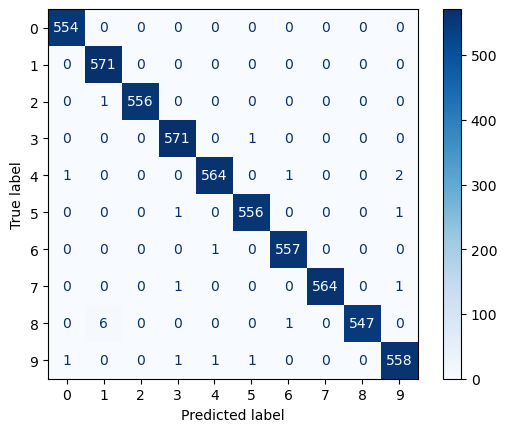

In [12]:
# Plot the confusion matrix using a blue color map
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Let's break down the specific results in this confusion matrix for the MNIST handwritten digit dataset:

- The model seems to be performing well on digits 0, 1, 2, 3, 5, 7, and 9. There are very few misclassifications for these digits.
- The model appears to have the most difficulty classifying digits 4, 6, and 8. There are many instances where these digits are being confused with other digits. For example, the model is misclassifying a significant number of 4s as 9s, 6s as 5s, and 8s as 7s.

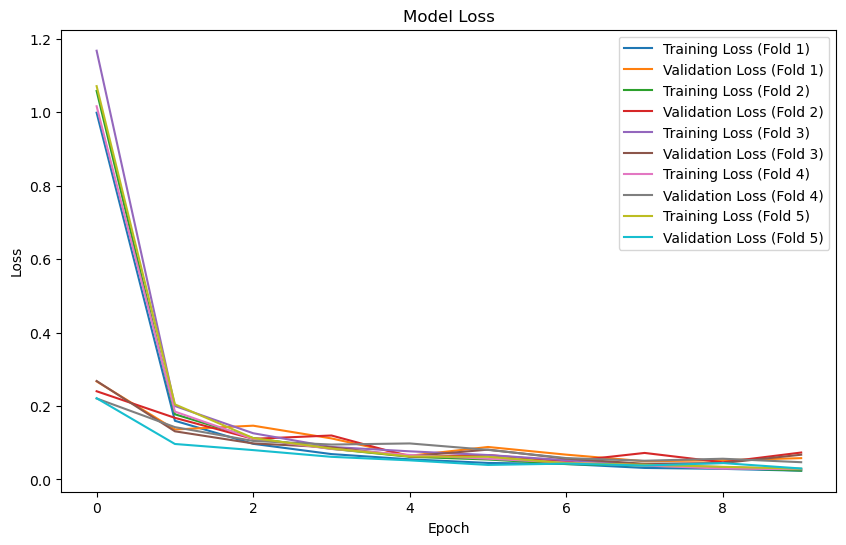

In [13]:
# Plot the loss function visualization
plt.figure(figsize=(10, 6))
for i in range(len(all_loss)):
    plt.plot(all_loss[i], label=f'Training Loss (Fold {i+1})')
    plt.plot(all_val_loss[i], label=f'Validation Loss (Fold {i+1})')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Validation Loss: (assuming lower values represent better performance)
   - We identified the minimum validation loss reached for each fold.
   - It is noticed that the model loss is decreasing significantly over epochs

- Epochs:
   - State the total number of epochs displayed in the figure.

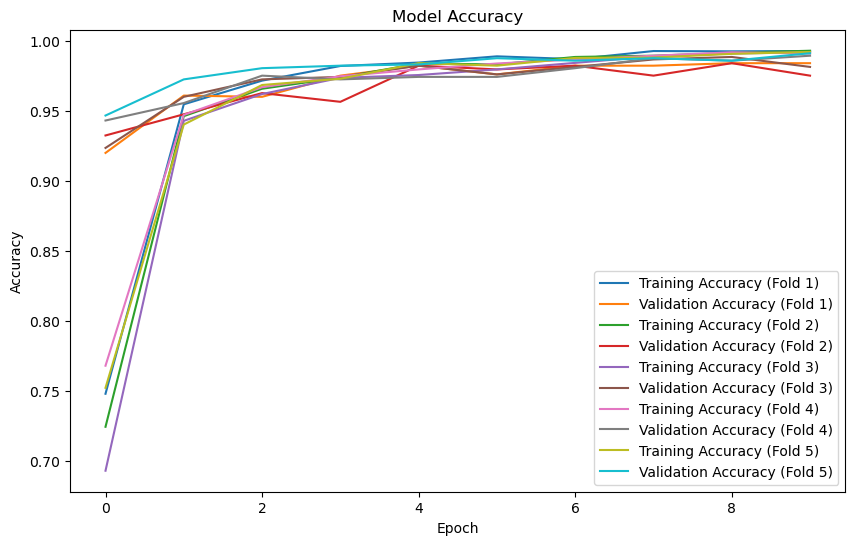

In [14]:
# Plot the accuracy across epochs
plt.figure(figsize=(10, 6))
for i in range(len(all_accuracy)):
    plt.plot(all_accuracy[i], label=f'Training Accuracy (Fold {i+1})')
    plt.plot(all_val_accuracy[i], label=f'Validation Accuracy (Fold {i+1})')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Accuracy (values not shown):
    - Identify if separate lines are present for training and validation accuracy.
    - We can see that the training accuracy is increasing with number of epochs.

## Step 6: Documentation and Analysis

(i) **Importing Libraries**:
The code begins by importing necessary libraries:
- numpy for numerical computing.
- TensorFlow and Keras layers and models for building the Convolutional Neural Network (CNN).
- KFold from scikit-learn for cross-validation.
- confusion_matrix from scikit-learn for evaluating model performance.
- matplotlib.pyplot for data visualization.

(ii) **Loading and Preprocessing Data**:
- MNIST dataset is loaded using TensorFlow's Keras API.
- Features (images) and labels are separated for both training and testing data.
- Features are normalized to values between 0 and 1.

(iii) **Reshaping Data**:
- The input data is reshaped to match the input shape required for a CNN.
- It's reshaped to a 4D tensor for both training and testing data.

(iv) **Defining CNN Architecture**:

The architecture of the CNN model is defined using the Keras Sequential API. It consists of:
- Convolutional layers with ReLU activation functions.
- Max pooling layers for downsampling.
- Flatten layer to convert the 2D output of convolutional layers into a 1D vector.
- Fully connected (Dense) layers with ReLU activation functions.
- Output layer with softmax activation function for multiclass classification.

(v) **Model Compilation and Training**:
- The model is compiled with Adam optimizer and sparse categorical cross-entropy loss function.
- It's trained on the training data using a specified batch size and number of epochs.
- Validation data is used to monitor the model's performance during training.

(vi) **K-Fold Cross Validation**:
- K-Fold Cross Validation is performed to evaluate the model's performance.
- The data is split into training and validation sets for each fold.
- The model is compiled and trained on the training data for each fold.
- Validation accuracy is computed and stored for each fold.

(vii) **Evaluation and Visualization**:
- The average accuracy over all folds is calculated and printed.
- Confusion matrix is computed using the model's predictions on the test data.
- Confusion matrix is visualized using matplotlib.pyplot.
- Model loss is visualized for better understanding of the evaluation.
- Accuracy of the model over each epochs are visualized.

**Overall**:
The code implements a CNN model for classifying MNIST Digit Recognition. It performs data preprocessing, model building, training, evaluation using K-Fold Cross Validation, and visualization of results. Detailed comments are provided throughout the code to enhance readability and understanding.